In [90]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.stats import norm

# Докажем что CLT работает

Text(0.5, 1.0, 'Эталонное нормальное распределение')

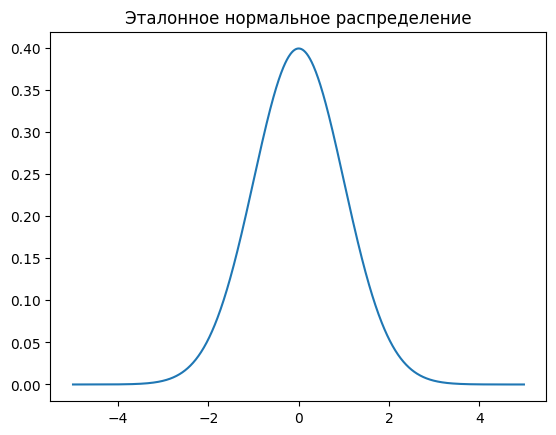

In [2]:
x = np.arange(-5, 5, step=0.01)
y = norm.pdf(x)

plt.plot(x, y)
plt.title("Эталонное нормальное распределение")

Text(0.5, 0.98, 'При большом N мы приближаемся к нормальному распределению')

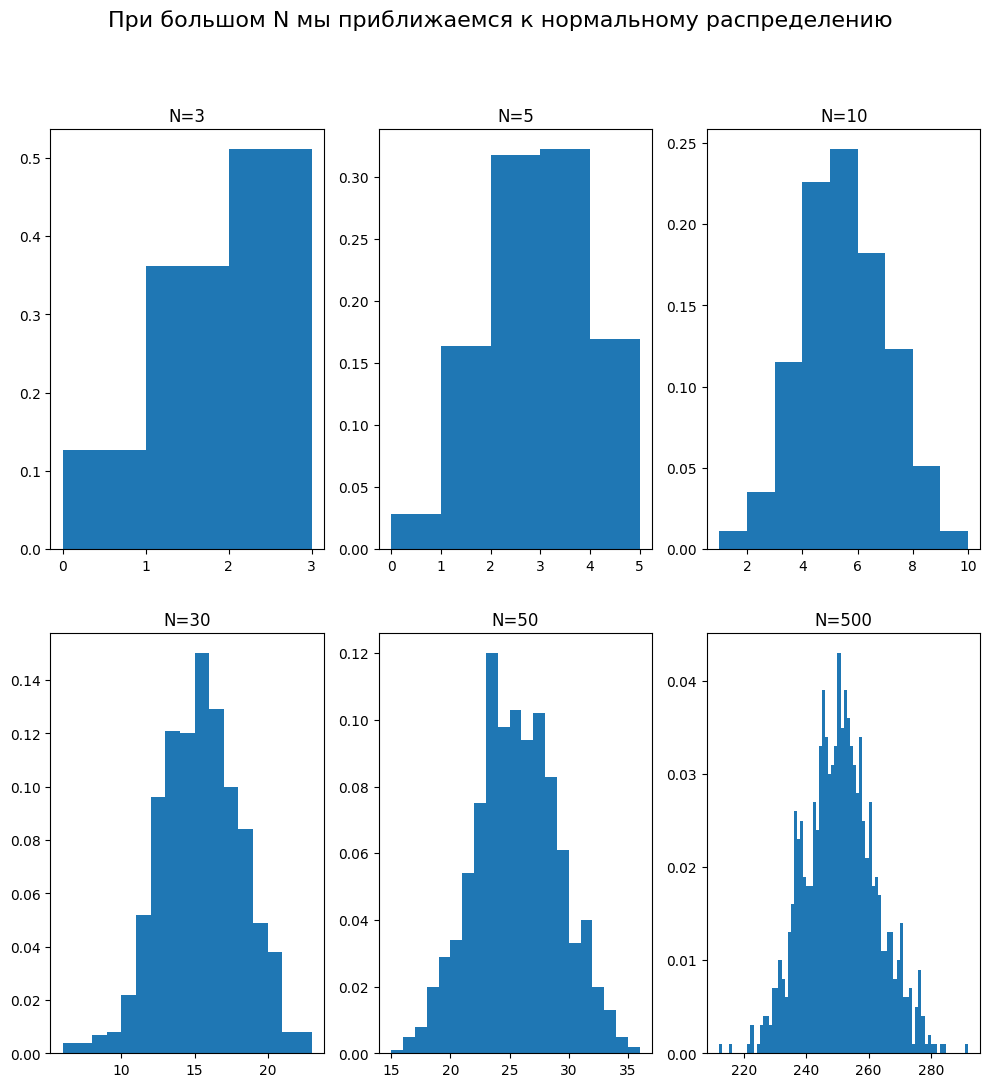

In [40]:
fig, ax = plt.subplots(2, 3, figsize=(12, 12))
ax = ax.ravel()
x = np.arange(0, 1, step=0.1)

for idx, end in enumerate([3, 5, 10, 30, 50, 500]):
    end = end
    # Берез из нашей генеральной выборки 1000 семплов по размером 3, 5, 10, 30, 50, 500
    sums = [np.random.binomial(end, 0.5) for _ in range(1000)]
    
    ax[idx].hist(sums, bins=max(sums) - min(sums), range=[min(sums), max(sums)], density=True)
    ax[idx].set_title(label=f"N={end}")
fig.suptitle("При большом N мы приближаемся к нормальному распределению", size=16)

# Мы отправили 500 пользователей в эксперементальную группу и увидели рост метрики

H_0: mu = 0.3

H_1: mu != 0.3

In [45]:
mu_control = 0.3
mu_exp = 0.35
n = 500
selective_std = 1

## В соответствии с CLT

`mu_exp` распределенно стремится к нормальноу распределению. Поэтому если наше значение нормальной величины попало в хвост, мы говорим что это маловероятно при нулевой гипотезе - а это значит, что она неверна и среднее действительно изменилось.

Давайте проведем наш тест

In [47]:
Y = (mu_exp - mu_control) / (selective_std / math.sqrt(n))
Y

1.1180339887498947

# Student-T

Вообще то распределение `Y` при достаточно большом `n` распределено как нормальное стандартное распределение, поэтому мы можем отсекать хвосты по нему. Давайте проверим наше значение

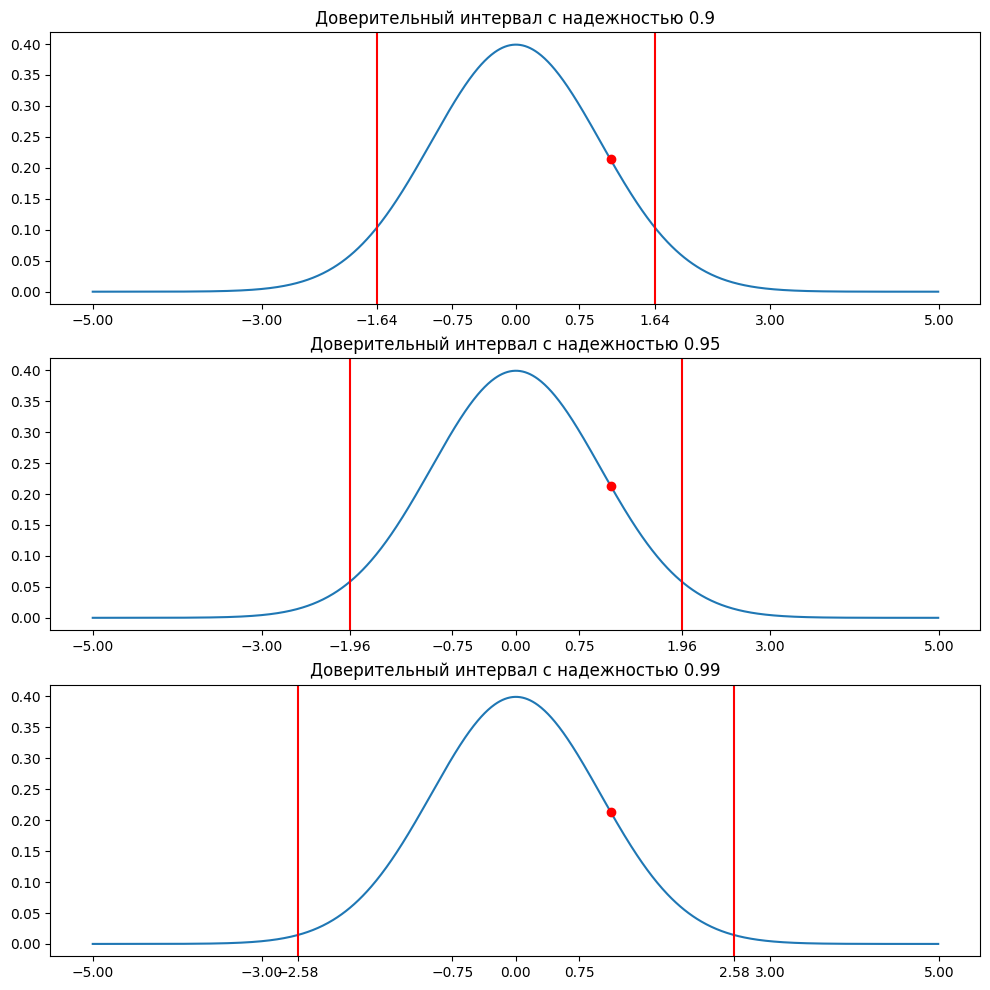

In [87]:
def plot_normals_with_confidence_intervals(
    value,
    alphas=[0.1, 0.05, 0.01]
):
    fig, ax = plt.subplots(3, 1, figsize=(12, 12))
    ax = ax.ravel()
    x = np.arange(-5, 5, step=0.01)
    for idx, alpha in enumerate(alphas):
        y = norm.pdf(x)
        ppf_start = norm.ppf(alpha / 2)
        ppf_end = norm.ppf(1 - alpha / 2)

        ax[idx].plot(x, y)
        ax[idx].axvline(x=ppf_start, color="red")
        ax[idx].axvline(x=ppf_end, color="red")
        ax[idx].set_xticks([ppf_start, ppf_end, 0, 3, -3, -0.75, 0.75, 5, -5])
        ax[idx].plot(value, norm.pdf(value), "ro")
        ax[idx].set_title(f"Доверительный интервал с надежностью {1 - alpha}")
        
plot_normals_with_confidence_intervals(Y)

# Мы не прошли тесты сверху, то есть пока что мы не можем сказать что пейвол годнота

Давайте расширим экспериментальную группу до 3000 тысяч пользователей


In [88]:
n = 3000
Y = (mu_exp - mu_control) / (selective_std / math.sqrt(n))
Y

2.73861278752583

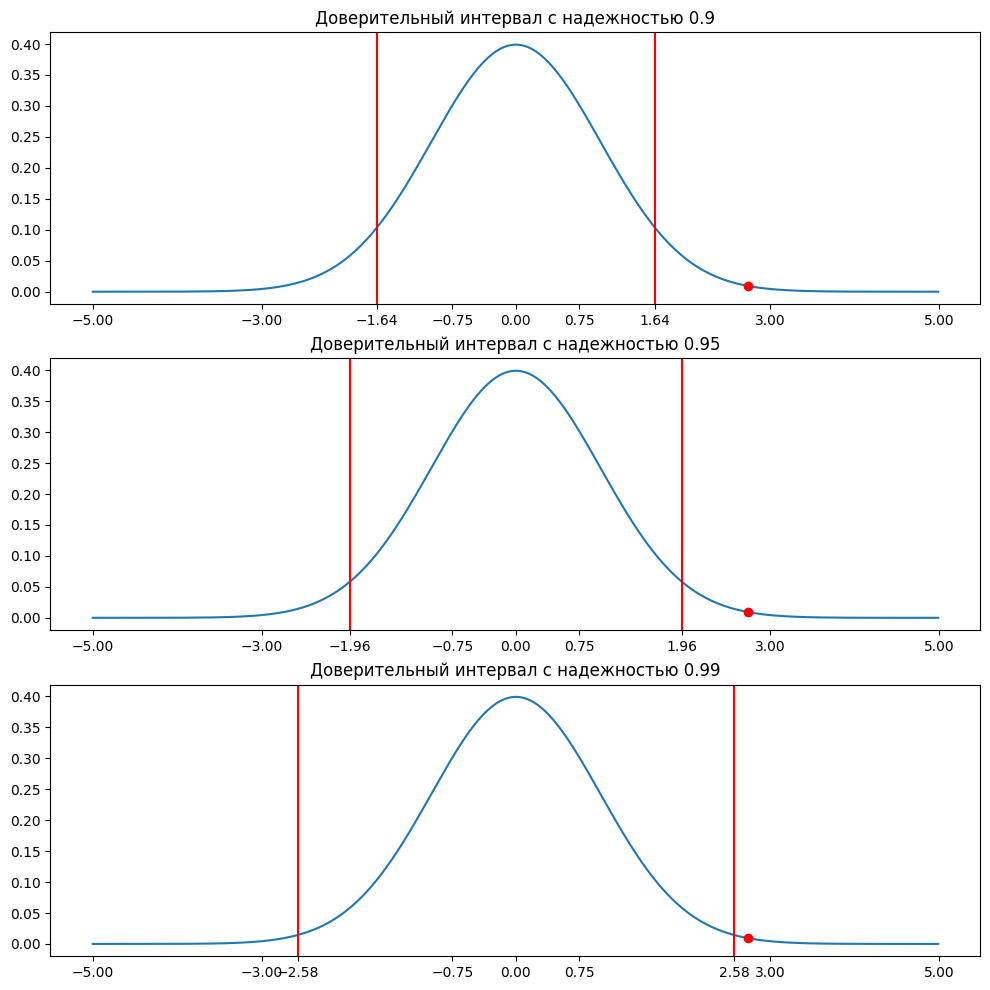

In [89]:
plot_normals_with_confidence_intervals(Y)

# Почему помогло расширение интервала.

Потому что чем больше пользователей мы передвинем в эксперементальную группу, тем более точное среднее значение мы получим.

Например, 2 пользователя -> оба купили что-то выборочное среднее будет 1 y.e.
Должно очень не повезти, чтобы получить среднее = 1 для ста пользователей

Мы увидели, что нулевая гипотеза ошибочна, мы увеличили среднее значение. А значит мы можем принимать эксперимент и раскатывать его на всех пользователей.